In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
from PIL import Image
import numpy as np
import os

# Folder containing images UNHEALTHY
folder_path_unhealthy = 'drive/My Drive/Unhealthy_new'

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_unhealthy, file) for file in os.listdir(folder_path_unhealthy) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_unhealthy = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_unhealthy.shape
image_array_unhealthy = image_array_unhealthy/255.0

In [4]:
# Folder containing images HEALTHY
folder_path_healthy = 'drive/My Drive/Healthy_new'

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_healthy, file) for file in os.listdir(folder_path_healthy) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_healthy = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_healthy.shape
image_array_healthy = image_array_healthy/255.0

In [5]:
# Folder containing images UNHEALTHY TEST
folder_path_unhealthy_test = 'drive/My Drive/Unhealthy_test'

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_unhealthy_test, file) for file in os.listdir(folder_path_unhealthy_test) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_unhealthy_test = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_unhealthy_test.shape

(22, 600, 1200, 4)

In [6]:
# Folder containing images HEALTHY TEST
folder_path_healthy_test = 'drive/My Drive/Healthy_test'

# List all image files in the folder
image_files_healthy_test = [os.path.join(folder_path_healthy_test, file) for file in os.listdir(folder_path_healthy_test) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_healthy_test = np.array([np.array(Image.open(file)) for file in image_files_healthy_test])
image_array_healthy_test.shape

(29, 600, 1200, 4)

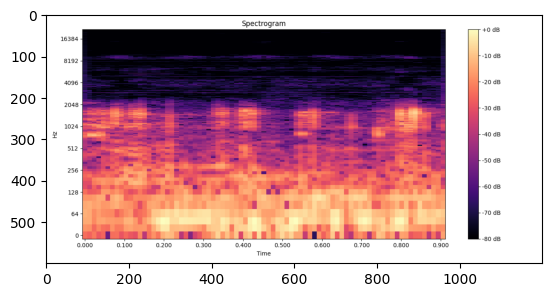

In [7]:
idx = random.randint(0, len(image_array_unhealthy_test))
plt.imshow(image_array_unhealthy_test[idx, :])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (600, 1200, 4)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (600, 1200, 4)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(image_array_unhealthy, image_array_healthy, epochs = 3, batch_size = 64)

In [ ]:
model.evaluate(image_array_unhealthy_test, image_array_healthy_test)

In [ ]:
idx2 = random.randint(0, len(image_array_healthy_test))
plt.imshow(image_array_unhealthy_test[idx2, :])
plt.show()

y_pred = model.predict(image_array_unhealthy_test[idx2, :].reshape(1, 600, 1200, 4))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'healthy'
else:
    pred = 'unhealthy'

print("Our model says it is :", pred)